---

In [170]:
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [171]:
import pandas as pd

In [172]:
df = pd.read_csv("../data/lotte.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247370 entries, 0 to 247369
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   자전거번호     247370 non-null  object 
 1   대여일시      247370 non-null  object 
 2   대여 대여소번호  247370 non-null  int64  
 3   대여 대여소명   247370 non-null  object 
 4   대여거치대     247370 non-null  int64  
 5   반납일시      247370 non-null  object 
 6   반납대여소번호   247370 non-null  float64
 7   반납대여소명    247370 non-null  object 
 8   반납거치대     247370 non-null  int64  
 9   이용시간(분)   247370 non-null  int64  
 10  이용거리(M)   247370 non-null  float64
 11  이용자종류     247370 non-null  object 
 12  대여대여소ID   247370 non-null  object 
 13  반납대여소ID   247370 non-null  object 
 14  자치구       247370 non-null  object 
 15  반납 자치구    247370 non-null  object 
 16  날짜        247370 non-null  object 
 17  연도        247370 non-null  int64  
 18  월         247370 non-null  int64  
 19  일         247370 non-null  int64  
 20  요일  

In [173]:
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여대여소ID,반납대여소ID,자치구,반납 자치구,날짜,연도,월,일,요일,휴일여부
0,SPB-69309,2024-04-01 00:34:21,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 00:40:39,2639.0,석촌역 8번출구,0,6,...,ST-891,ST-1866,송파구,송파구,2024-04-01,2024,4,1,0,0
1,SPB-37133,2024-04-01 01:07:58,2658,가락몰 업무동,0,2024-04-01 01:21:55,1210.0,롯데월드타워(잠실역2번출구 쪽),0,13,...,ST-2409,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0
2,SPB-66954,2024-04-01 01:23:55,1222,잠실새내역 5번 출구 뒤,0,2024-04-01 01:44:58,1210.0,롯데월드타워(잠실역2번출구 쪽),0,21,...,ST-547,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0
3,SPB-37133,2024-04-01 02:55:30,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:07:56,2646.0,레이크펠리스101동앞,0,12,...,ST-891,ST-1867,송파구,송파구,2024-04-01,2024,4,1,0,0
4,SPB-66954,2024-04-01 02:55:24,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:08:10,2646.0,레이크펠리스101동앞,0,12,...,ST-891,ST-1867,송파구,송파구,2024-04-01,2024,4,1,0,0


In [174]:
# 대여일시, 반납일시 datetime type으로 변경
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [175]:
# 대여소명이 롯데월드타워인 데이터와 반납 대여소명이 롯데월드타워인 데이터 추출

rent_data = df[df['대여 대여소명'] == '롯데월드타워(잠실역2번출구 쪽)']
return_data = df[df['반납대여소명'] == '롯데월드타워(잠실역2번출구 쪽)']

In [176]:
rent_data.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여대여소ID,반납대여소ID,자치구,반납 자치구,날짜,연도,월,일,요일,휴일여부
0,SPB-69309,2024-04-01 00:34:21,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 00:40:39,2639.0,석촌역 8번출구,0,6,...,ST-891,ST-1866,송파구,송파구,2024-04-01,2024,4,1,0,0
3,SPB-37133,2024-04-01 02:55:30,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:07:56,2646.0,레이크펠리스101동앞,0,12,...,ST-891,ST-1867,송파구,송파구,2024-04-01,2024,4,1,0,0
4,SPB-66954,2024-04-01 02:55:24,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 03:08:10,2646.0,레이크펠리스101동앞,0,12,...,ST-891,ST-1867,송파구,송파구,2024-04-01,2024,4,1,0,0
12,SPB-68175,2024-04-01 06:21:13,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 06:23:39,2608.0,송파구청,0,2,...,ST-891,ST-1681,송파구,송파구,2024-04-01,2024,4,1,0,0
13,SPB-65003,2024-04-01 06:28:59,1210,롯데월드타워(잠실역2번출구 쪽),0,2024-04-01 06:29:06,1210.0,롯데월드타워(잠실역2번출구 쪽),0,0,...,ST-891,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0


In [177]:
return_data.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여대여소ID,반납대여소ID,자치구,반납 자치구,날짜,연도,월,일,요일,휴일여부
1,SPB-37133,2024-04-01 01:07:58,2658,가락몰 업무동,0,2024-04-01 01:21:55,1210.0,롯데월드타워(잠실역2번출구 쪽),0,13,...,ST-2409,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0
2,SPB-66954,2024-04-01 01:23:55,1222,잠실새내역 5번 출구 뒤,0,2024-04-01 01:44:58,1210.0,롯데월드타워(잠실역2번출구 쪽),0,21,...,ST-547,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0
5,SPB-68175,2024-04-01 05:02:07,1248,방이초등학교,0,2024-04-01 05:15:32,1210.0,롯데월드타워(잠실역2번출구 쪽),0,13,...,ST-908,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0
6,SPB-59206,2024-04-01 05:09:12,2641,송파역 4번출구,0,2024-04-01 05:21:07,1210.0,롯데월드타워(잠실역2번출구 쪽),0,11,...,ST-1793,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0
7,SPB-47005,2024-04-01 04:18:38,1222,잠실새내역 5번 출구 뒤,0,2024-04-01 05:36:38,1210.0,롯데월드타워(잠실역2번출구 쪽),0,78,...,ST-547,ST-891,송파구,송파구,2024-04-01,2024,4,1,0,0


In [178]:
# 대여소명 기준으로 대여대수 집계
rent_count = rent_data.groupby(['대여 대여소명', rent_data['대여일시'].dt.date.rename('날짜'), rent_data['대여일시'].dt.hour.rename('시간대')]).size().reset_index(name='대여대수')

# 반납소명 기준으로 반납대수 집계
return_count = return_data.groupby(['반납대여소명', return_data['반납일시'].dt.date.rename('날짜'), return_data['반납일시'].dt.hour.rename('시간대')]).size().reset_index(name='반납대수')

In [179]:
# 대여대수와 반납대수를 날짜와 시간대를 기준으로 병합
merged_data = pd.merge(
    rent_count.rename(columns={'대여 대여소명': '대여소'}),
    return_count.rename(columns={'반납대여소명': '대여소'}),
    on=['대여소', '날짜', '시간대'],
    how='outer'
).fillna(0)  # NaN 값은 0으로 대체

# 병합된 데이터 확인
print(merged_data.head())

                 대여소          날짜  시간대  대여대수  반납대수
0  롯데월드타워(잠실역2번출구 쪽)  2023-05-01    0   1.0   1.0
1  롯데월드타워(잠실역2번출구 쪽)  2023-05-01    1   1.0   0.0
2  롯데월드타워(잠실역2번출구 쪽)  2023-05-01    4   1.0   0.0
3  롯데월드타워(잠실역2번출구 쪽)  2023-05-01    6   0.0   3.0
4  롯데월드타워(잠실역2번출구 쪽)  2023-05-01    7   4.0   7.0


In [180]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소     8377 non-null   object 
 1   날짜      8377 non-null   object 
 2   시간대     8377 non-null   int32  
 3   대여대수    8377 non-null   float64
 4   반납대수    8377 non-null   float64
dtypes: float64(2), int32(1), object(2)
memory usage: 294.6+ KB


In [181]:
# 날짜 column을 datetime으로 변환
merged_data['날짜'] = pd.to_datetime(merged_data['날짜'])

# 연, 월, 일. 휴일여부 컬럼 추가
merged_data['연'] = merged_data['날짜'].dt.year
merged_data['월'] = merged_data['날짜'].dt.month
merged_data['일'] = merged_data['날짜'].dt.day
merged_data['휴일여부'] = merged_data['날짜'].dt.weekday.apply(lambda x: '휴일' if x >= 5 else '평일')

merged_data

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부
0,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,평일
1,롯데월드타워(잠실역2번출구 쪽),2023-05-01,1,1.0,0.0,2023,5,1,평일
2,롯데월드타워(잠실역2번출구 쪽),2023-05-01,4,1.0,0.0,2023,5,1,평일
3,롯데월드타워(잠실역2번출구 쪽),2023-05-01,6,0.0,3.0,2023,5,1,평일
4,롯데월드타워(잠실역2번출구 쪽),2023-05-01,7,4.0,7.0,2023,5,1,평일
...,...,...,...,...,...,...,...,...,...
8372,롯데월드타워(잠실역2번출구 쪽),2024-05-31,19,29.0,27.0,2024,5,31,평일
8373,롯데월드타워(잠실역2번출구 쪽),2024-05-31,20,27.0,25.0,2024,5,31,평일
8374,롯데월드타워(잠실역2번출구 쪽),2024-05-31,21,19.0,18.0,2024,5,31,평일
8375,롯데월드타워(잠실역2번출구 쪽),2024-05-31,22,8.0,10.0,2024,5,31,평일


In [182]:
# 계절 함수 
# 0: 봄, 1: 여름, 2:가을, 3:겨울
def get_seasons(month):
    if month in [3, 4, 5]:
        return 0
    elif month in [6, 7, 8]:
        return 1
    elif month in [9, 10, 11]:
        return 2
    elif month in [12, 1, 2]:
        return 3

# 계절 컬럼 추가
merged_data['계절'] = merged_data['월'].apply(get_seasons)

# 데이터 확인
merged_data

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절
0,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,평일,0
1,롯데월드타워(잠실역2번출구 쪽),2023-05-01,1,1.0,0.0,2023,5,1,평일,0
2,롯데월드타워(잠실역2번출구 쪽),2023-05-01,4,1.0,0.0,2023,5,1,평일,0
3,롯데월드타워(잠실역2번출구 쪽),2023-05-01,6,0.0,3.0,2023,5,1,평일,0
4,롯데월드타워(잠실역2번출구 쪽),2023-05-01,7,4.0,7.0,2023,5,1,평일,0
...,...,...,...,...,...,...,...,...,...,...
8372,롯데월드타워(잠실역2번출구 쪽),2024-05-31,19,29.0,27.0,2024,5,31,평일,0
8373,롯데월드타워(잠실역2번출구 쪽),2024-05-31,20,27.0,25.0,2024,5,31,평일,0
8374,롯데월드타워(잠실역2번출구 쪽),2024-05-31,21,19.0,18.0,2024,5,31,평일,0
8375,롯데월드타워(잠실역2번출구 쪽),2024-05-31,22,8.0,10.0,2024,5,31,평일,0


In [183]:
merged_data.isnull().sum()

대여소     0
날짜      0
시간대     0
대여대수    0
반납대수    0
연       0
월       0
일       0
휴일여부    0
계절      0
dtype: int64

In [184]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대여소     8377 non-null   object        
 1   날짜      8377 non-null   datetime64[ns]
 2   시간대     8377 non-null   int32         
 3   대여대수    8377 non-null   float64       
 4   반납대수    8377 non-null   float64       
 5   연       8377 non-null   int32         
 6   월       8377 non-null   int32         
 7   일       8377 non-null   int32         
 8   휴일여부    8377 non-null   object        
 9   계절      8377 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(2)
memory usage: 523.7+ KB


In [185]:
# 요일 컬럼 추가
merged_data['요일'] = merged_data['날짜'].dt.day_name(locale='ko_KR')

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대여소     8377 non-null   object        
 1   날짜      8377 non-null   datetime64[ns]
 2   시간대     8377 non-null   int32         
 3   대여대수    8377 non-null   float64       
 4   반납대수    8377 non-null   float64       
 5   연       8377 non-null   int32         
 6   월       8377 non-null   int32         
 7   일       8377 non-null   int32         
 8   휴일여부    8377 non-null   object        
 9   계절      8377 non-null   int64         
 10  요일      8377 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(3)
memory usage: 589.1+ KB


In [186]:
merged_data.to_csv("../data/lotte12.csv", index=False)
df = pd.read_csv("../data/lotte12.csv")
df.head()

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절,요일
0,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,평일,0,월요일
1,롯데월드타워(잠실역2번출구 쪽),2023-05-01,1,1.0,0.0,2023,5,1,평일,0,월요일
2,롯데월드타워(잠실역2번출구 쪽),2023-05-01,4,1.0,0.0,2023,5,1,평일,0,월요일
3,롯데월드타워(잠실역2번출구 쪽),2023-05-01,6,0.0,3.0,2023,5,1,평일,0,월요일
4,롯데월드타워(잠실역2번출구 쪽),2023-05-01,7,4.0,7.0,2023,5,1,평일,0,월요일


---

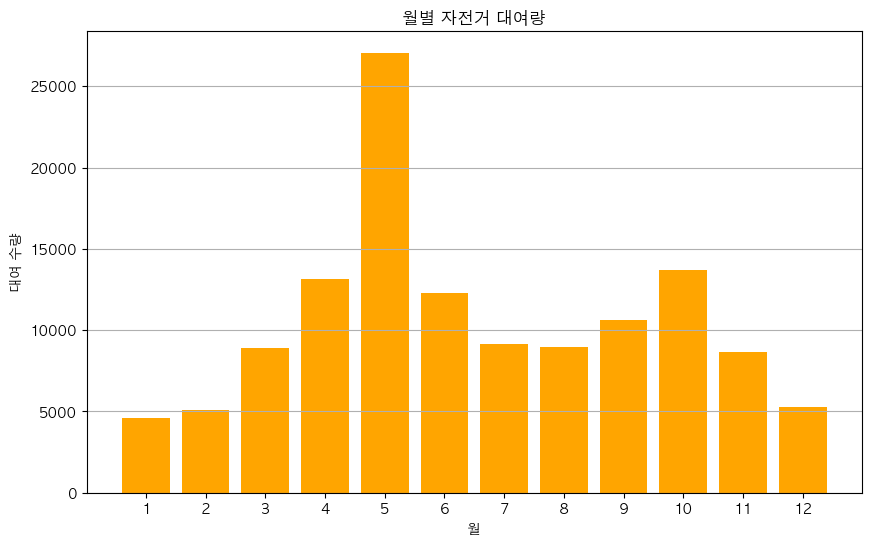

In [187]:
monthly_rentals = df.groupby('월')['대여대수'].sum()
plt.figure(figsize=(10, 6))
plt.bar(monthly_rentals.index, monthly_rentals.values, color='orange')
plt.title('월별 자전거 대여량')
plt.xlabel('월')
plt.ylabel('대여 수량')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()

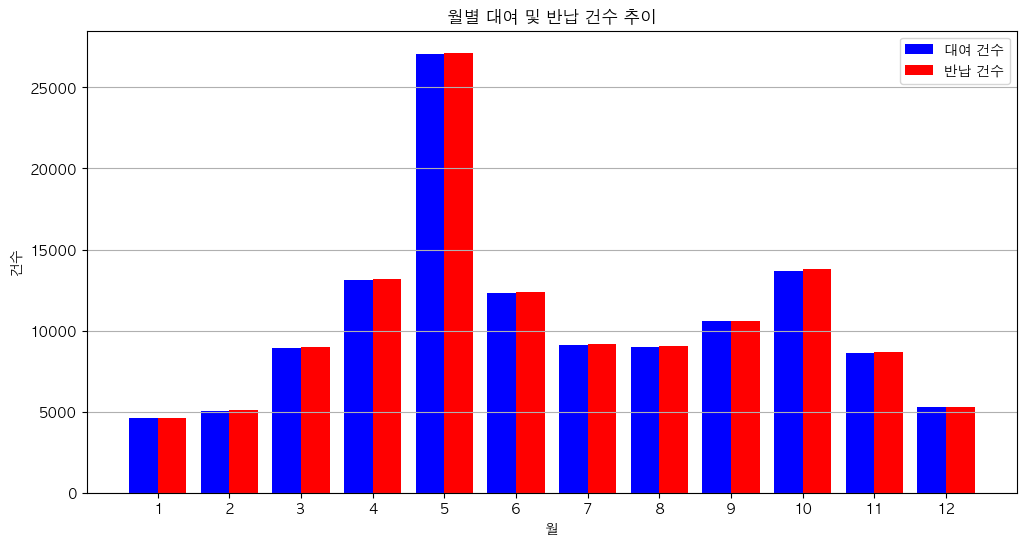

In [188]:
# 월별 대여 및 반납 건수 집계
monthly_rentals = df.groupby('월')['대여대수'].sum().reset_index()
monthly_returns = df.groupby('월')['반납대수'].sum().reset_index()

# 월별 대여 및 반납 건수 시각화 (바 그래프)
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = monthly_rentals['월']

plt.bar(index - bar_width/2, monthly_rentals['대여대수'], bar_width, label='대여 건수', color='blue')
plt.bar(index + bar_width/2, monthly_returns['반납대수'], bar_width, label='반납 건수', color='red')
plt.title('월별 대여 및 반납 건수 추이')
plt.xlabel('월')
plt.ylabel('건수')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(axis='y')
plt.show()

> 5월달의 대여건수가 압도적으로 많다                        

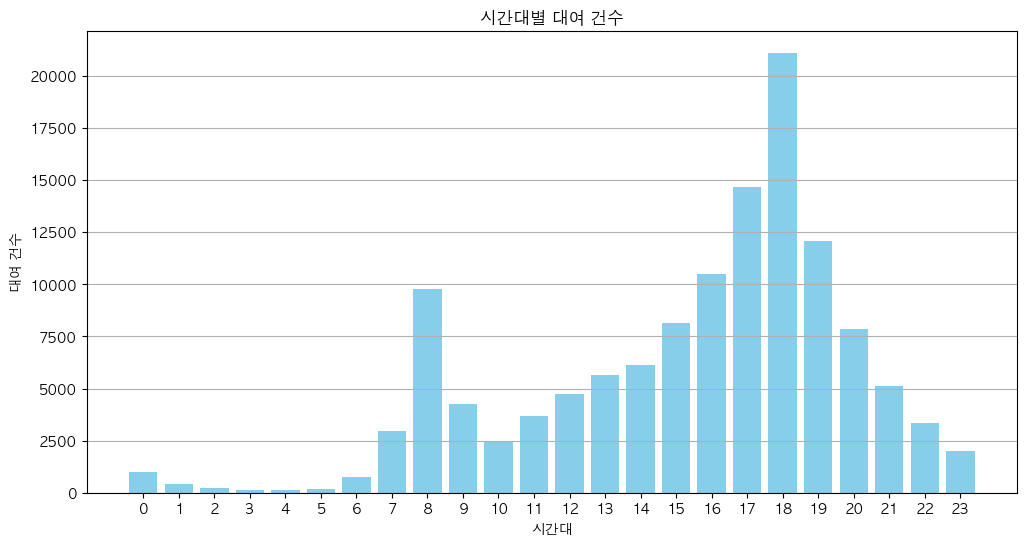

In [189]:
# 시간대별 대여 건수 집계
hourly_rentals = df.groupby('시간대')['대여대수'].sum().reset_index()

# 시간대별 대여 건수 시각화
plt.figure(figsize=(12, 6))
plt.bar(hourly_rentals['시간대'], hourly_rentals['대여대수'], color='skyblue')
plt.title('시간대별 대여 건수')
plt.xlabel('시간대')
plt.ylabel('대여 건수')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

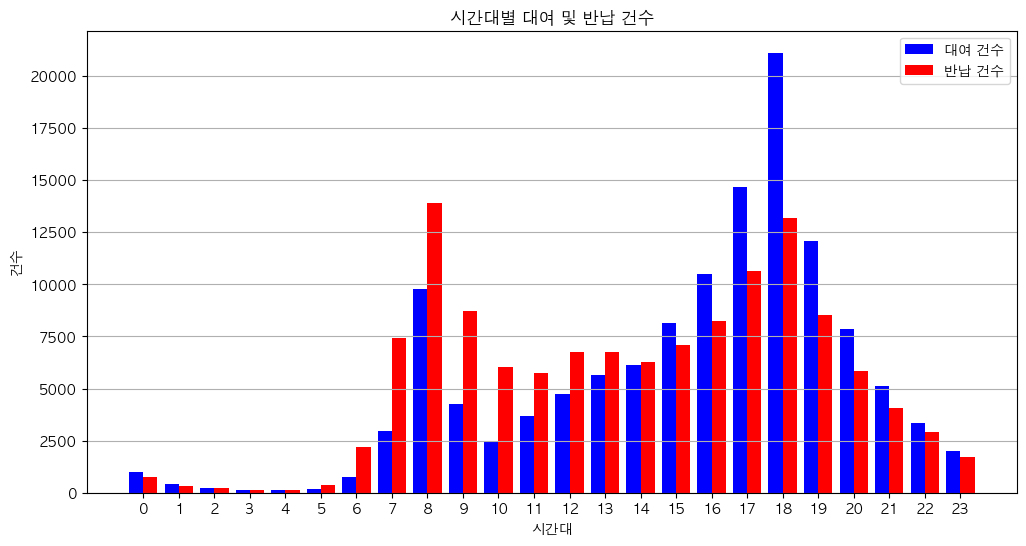

In [190]:
# 시간대별 대여 및 반납 건수 집계
hourly_rentals = df.groupby('시간대')['대여대수'].sum().reset_index()
hourly_returns = df.groupby('시간대')['반납대수'].sum().reset_index()

# 두 데이터프레임을 병합
daily_data = hourly_rentals.merge(hourly_returns, on='시간대', suffixes=('_대여', '_반납'))

# 시간대별 대여 및 반납 수량 시각화
plt.figure(figsize=(12, 6))
plt.bar(daily_data['시간대'] - 0.2, daily_data['대여대수'], width=0.4, label='대여 건수', color='blue')
plt.bar(daily_data['시간대'] + 0.2, daily_data['반납대수'], width=0.4, label='반납 건수', color='red')
plt.title('시간대별 대여 및 반납 건수')
plt.xlabel('시간대')
plt.ylabel('건수')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y')
plt.show()

> 출퇴근 시간: 아침과 저녁 출퇴근 시간대에 대여가 집중되어 있다.

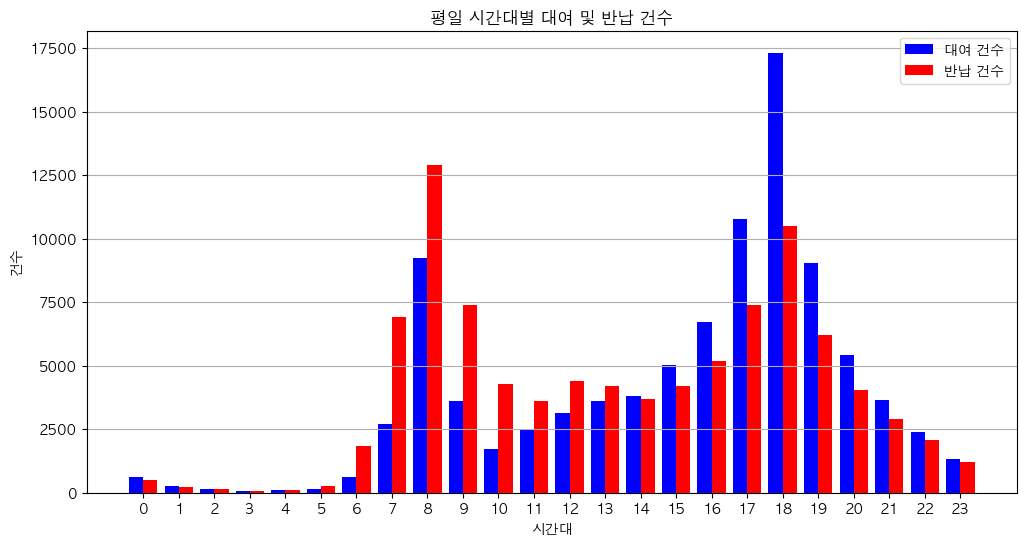

Text(0.5, 1.0, '주말 시간대별 대여 및 반납 건수')

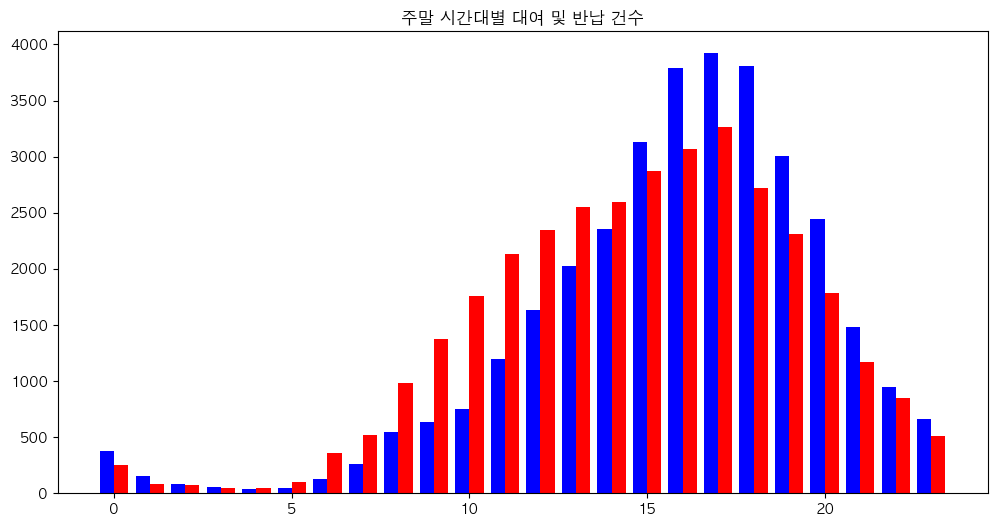

In [191]:
# 주말 이용 시간대 및 평일 이용시간대 분리
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 날짜를 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 요일 컬럼 추가
df['요일'] = df['날짜'].dt.dayofweek  # 0=월요일, 6=일요일

# 평일(0-4)과 주말(5-6) 데이터 분리
weekdays_data = df[df['요일'] < 5]  # Monday to Friday
weekends_data = df[df['요일'] >= 5]  # Saturday, Sunday

# 시간대별 대여 및 반납 건수 집계
hourly_rentals_weekdays = weekdays_data.groupby('시간대')['대여대수'].sum().reset_index()
hourly_returns_weekdays = weekdays_data.groupby('시간대')['반납대수'].sum().reset_index()

hourly_rentals_weekends = weekends_data.groupby('시간대')['대여대수'].sum().reset_index()
hourly_returns_weekends = weekends_data.groupby('시간대')['반납대수'].sum().reset_index()

# 두 데이터프레임을 병합
weekdays_data_merged = hourly_rentals_weekdays.merge(hourly_returns_weekdays, on='시간대', suffixes=('_대여', '_반납'))
weekends_data_merged = hourly_rentals_weekends.merge(hourly_returns_weekends, on='시간대', suffixes=('_대여', '_반납'))

# 평일 데이터 시각화
plt.figure(figsize=(12, 6))
plt.bar(weekdays_data_merged['시간대'] - 0.2, weekdays_data_merged['대여대수'], width=0.4, label='대여 건수', color='blue')
plt.bar(weekdays_data_merged['시간대'] + 0.2, weekdays_data_merged['반납대수'], width=0.4, label='반납 건수', color='red')
plt.title('평일 시간대별 대여 및 반납 건수')
plt.xlabel('시간대')
plt.ylabel('건수')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y')
plt.show()

# 주말 데이터 시각화
plt.figure(figsize=(12, 6))
plt.bar(weekends_data_merged['시간대'] - 0.2, weekends_data_merged['대여대수'], width=0.4, label='대여 건수', color='blue')
plt.bar(weekends_data_merged['시간대'] + 0.2, weekends_data_merged['반납대수'], width=0.4, label='반납 건수', color='red')
plt.title('주말 시간대별 대여 및 반납 건수')


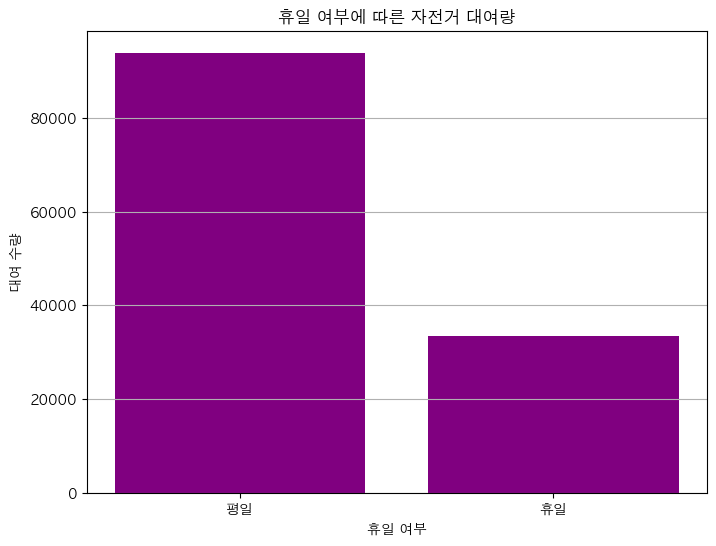

In [192]:
holiday_rentals = df.groupby('휴일여부')['대여대수'].sum()
plt.figure(figsize=(8, 6))
plt.bar(holiday_rentals.index, holiday_rentals.values, color='purple')
plt.title('휴일 여부에 따른 자전거 대여량')
plt.xlabel('휴일 여부')
plt.ylabel('대여 수량')
plt.grid(axis='y')
plt.show()

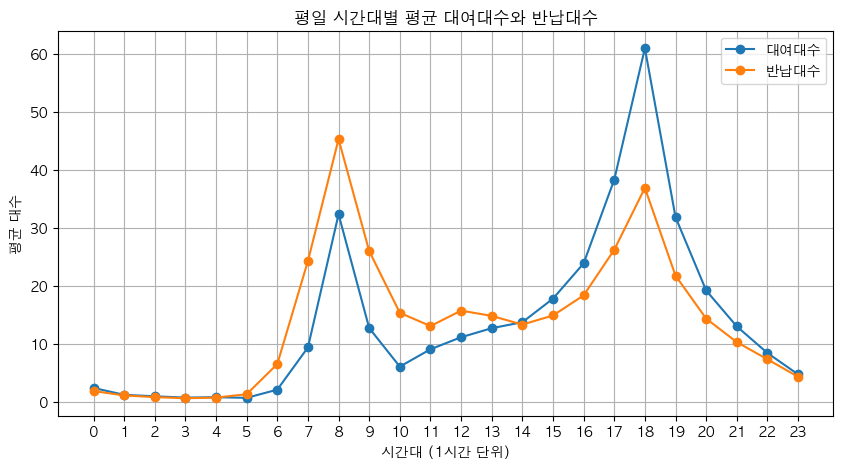

In [193]:
# '휴일여부'가 평일인 데이터만 필터링
holiday_data = df[df['휴일여부'] == '평일']

# 시간대별 평균 대여대수와 반납대수 계산
time_group = holiday_data.groupby('시간대')[['대여대수', '반납대수']].mean()

# 시각화
time_group.plot(kind='line', figsize=(10, 5), marker='o')
plt.title('평일 시간대별 평균 대여대수와 반납대수')
plt.xlabel('시간대 (1시간 단위)')
plt.ylabel('평균 대수')
plt.xticks(range(24))  # 0~23시로 설정
plt.grid()
plt.show()

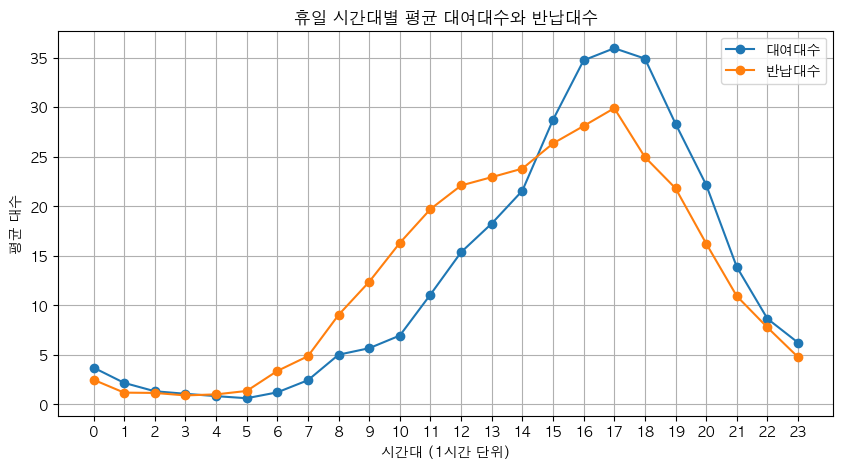

In [194]:
# '휴일여부'가 휴일인 데이터만 필터링
holiday_data = df[df['휴일여부'] == '휴일']

# 시간대별 평균 대여대수와 반납대수 계산
time_group = holiday_data.groupby('시간대')[['대여대수', '반납대수']].mean()

# 시각화
time_group.plot(kind='line', figsize=(10, 5), marker='o')
plt.title('휴일 시간대별 평균 대여대수와 반납대수')
plt.xlabel('시간대 (1시간 단위)')
plt.ylabel('평균 대수')
plt.xticks(range(24))  # 0~23시로 설정
plt.grid()
plt.show()

> 평일과 휴일중 평일이 앞도적으로 이용량이 높다. 

In [195]:
print(df['요일'].value_counts())
print(df['대여대수'].describe())

요일
4    1219
2    1207
3    1203
1    1200
0    1197
5    1186
6    1165
Name: count, dtype: int64
count    8377.000000
mean       15.207234
std        18.518506
min         0.000000
25%         3.000000
50%         9.000000
75%        20.000000
max       149.000000
Name: 대여대수, dtype: float64


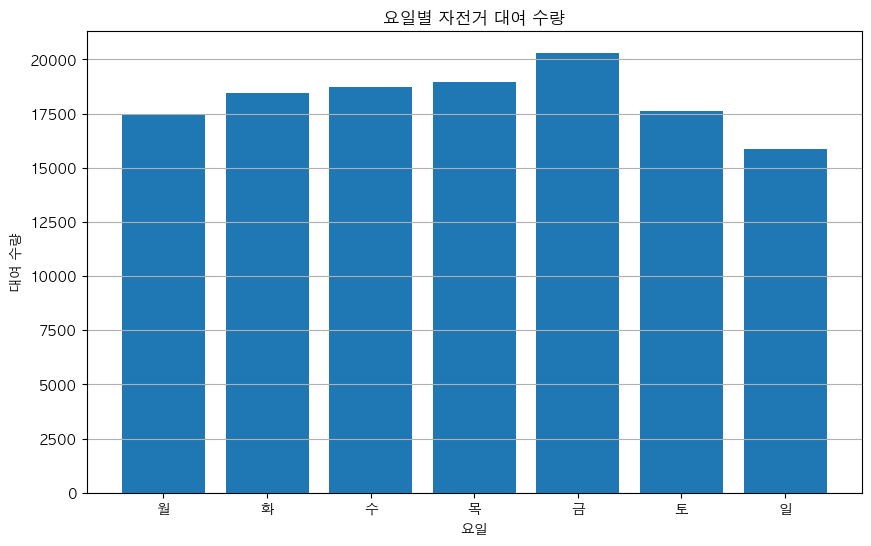

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

df['요일'] = pd.to_datetime(df['날짜']).dt.dayofweek

# 요일별 대여 수량 집계
weekday_rentals = df.groupby('요일')['대여대수'].sum()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(weekday_rentals.index, weekday_rentals.values)
plt.title('요일별 자전거 대여 수량')
plt.xlabel('요일')
plt.ylabel('대여 수량')
plt.xticks(range(7), ['월', '화', '수', '목', '금', '토', '일'])
plt.grid(axis='y')
plt.show()

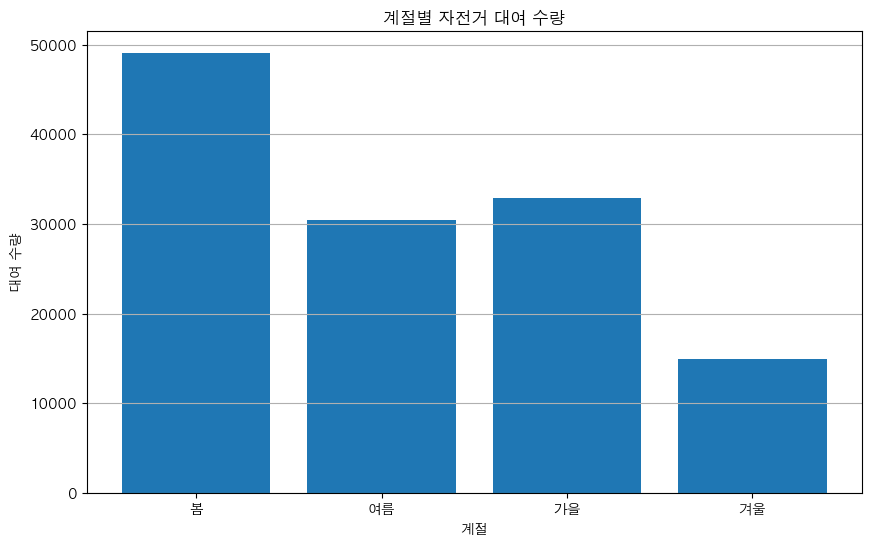

In [197]:
# 계절별 대여 수량 시각화
season_rentals = df.groupby('계절')['대여대수'].sum()
plt.figure(figsize=(10, 6))
plt.bar(season_rentals.index, season_rentals.values)
plt.title('계절별 자전거 대여 수량')
plt.xlabel('계절')
plt.ylabel('대여 수량')
plt.xticks(range(4), ['봄', '여름', '가을', '겨울'])  # x축 레이블 수정
plt.grid(axis='y')
plt.show()

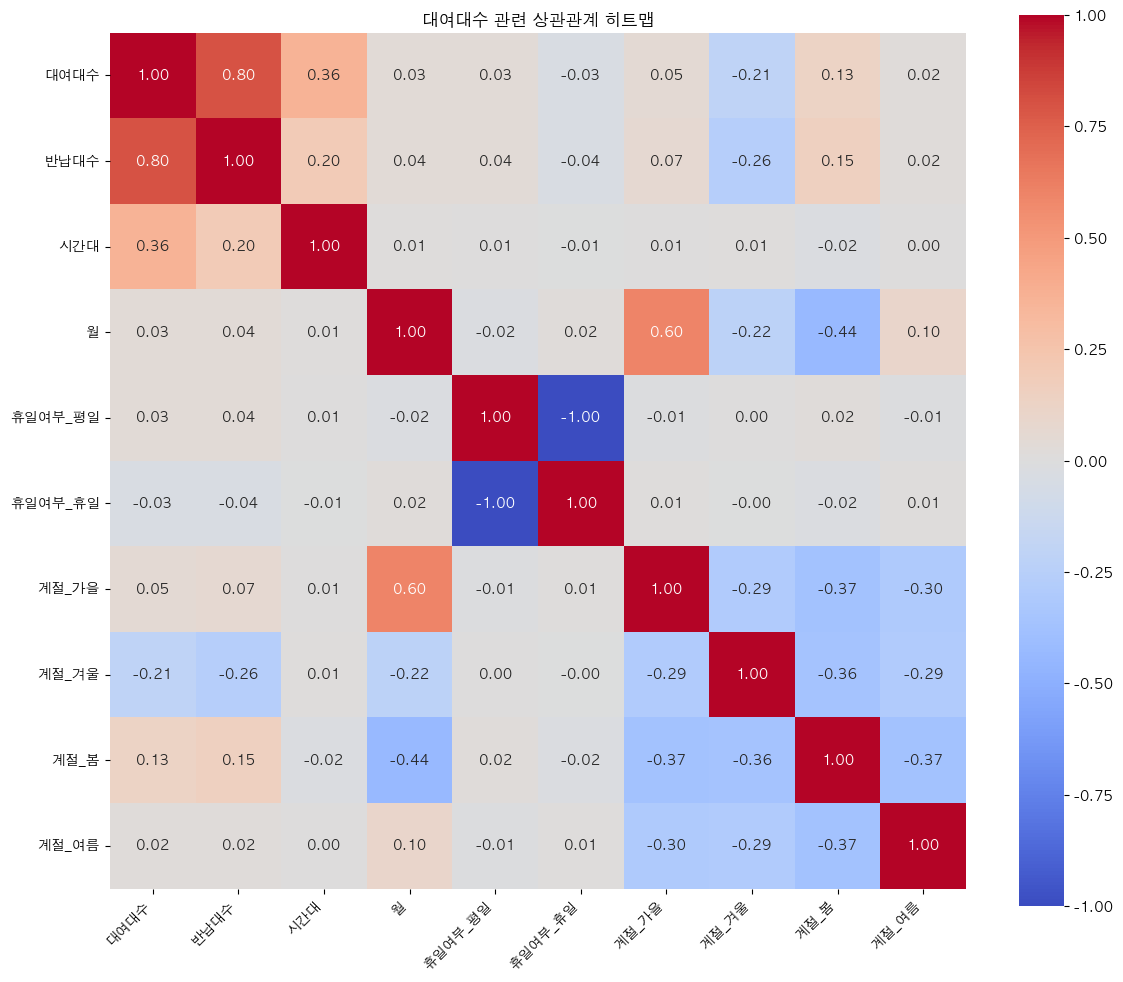

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# 계절 매핑
season_map = {0: '봄', 1: '여름', 2: '가을', 3: '겨울'}
df['계절'] = df['계절'].map(season_map)

# 이후 더미 변수 변환
df_encoded = pd.get_dummies(df, columns=['휴일여부', '계절', '요일'])


# 범주형 변수들을 더미 변수로 변환
df_encoded = pd.get_dummies(df, columns=['휴일여부', '계절', '요일'])

# 주요 변수들만 선택
selected_columns = ['대여대수', '반납대수', '시간대', '월'] + \
                  [col for col in df_encoded.columns if '휴일여부_' in col or '계절_' in col]

correlation_data = df_encoded[selected_columns]

# 상관관계 행렬 계산
correlation_matrix = correlation_data.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f',
            center=0,
            square=True)
plt.title('대여대수 관련 상관관계 히트맵')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

> 만약 따릉이를 출퇴근 용도로만 사용한다고 할 시는 월별로 균등할텐데 5월에만 건수 추이가 굉장히 높은 것으로 획인되는 것을 보니 석촌호수의 자전거도로 이용이 많을 듯 하여 좀더 확인해보기 위해 날씨데이터 추가

In [199]:
df_w = pd.read_csv("../data/송파구날씨통합.csv")
df_w.head()

,지점,지점명,일시,기온(°C),강수량(mm),습도(%),전운량(10분위),시정(10m),date,시간,PM10,PM25
0,108,서울,2023-05-01 00:00:00,12.1,0.0,87,9,1049,2023-05-01,0,67.0,30.0
1,108,서울,2023-05-01 01:00:00,11.6,0.0,88,6,957,2023-05-01,1,66.0,26.0
2,108,서울,2023-05-01 02:00:00,11.0,0.0,90,6,778,2023-05-01,2,64.0,28.0
3,108,서울,2023-05-01 03:00:00,10.8,0.0,91,8,672,2023-05-01,3,58.0,22.0
4,108,서울,2023-05-01 04:00:00,10.4,0.0,92,8,633,2023-05-01,4,56.0,22.0


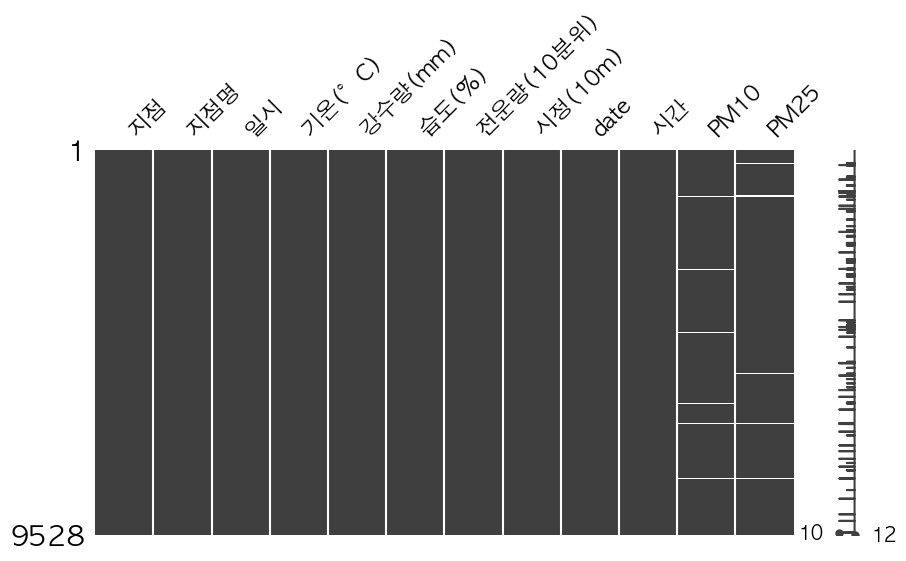

In [200]:
# 결측치 시각화
import missingno as msno
msno.matrix(df_w, figsize=(10,5))
plt.show()

#### 미세먼지 농도 관련된 데이에 NaN값 확인됨
> 시간대별 평균으로 대치

In [201]:
# 시간대별 평균 계산
avg_pm = df_w.groupby('시간')[['PM10', 'PM25']].mean().reset_index()
avg_pm.columns = ['시간', 'avg_PM10', 'avg_PM25']

# NaN 값 채우기
for index, row in df_w.iterrows():
    if pd.isna(row['PM10']):
        df_w.at[index, 'PM10'] = avg_pm[avg_pm['시간'] == row['시간']]['avg_PM10'].values[0]
    if pd.isna(row['PM25']):
        df_w.at[index, 'PM25'] = avg_pm[avg_pm['시간'] == row['시간']]['avg_PM25'].values[0]

# NaN 값이 남아있는지 확인
df_w[['PM10', 'PM25']].isnull().sum()

PM10    0
PM25    0
dtype: int64

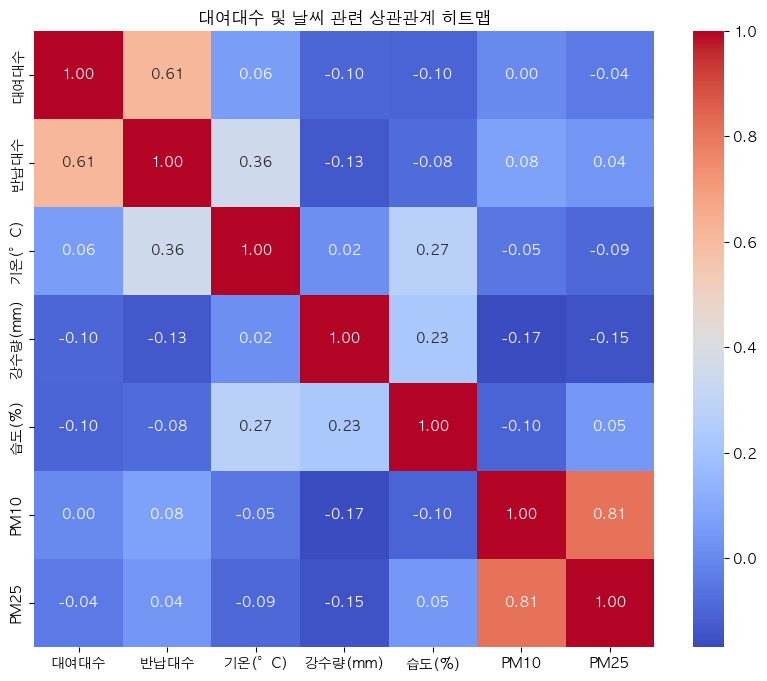

In [202]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 날짜와 시간대를 기준으로 데이터 병합
df['날짜'] = pd.to_datetime(df['날짜'])
df_w['일시'] = pd.to_datetime(df_w['일시'])
merged_df = pd.merge(df, df_w, left_on=['날짜', '시간대'], right_on=['일시', '시간'], how='inner')

# 필요한 열 선택
correlation_data = merged_df[['대여대수', '반납대수', '기온(°C)', '강수량(mm)', '습도(%)', 'PM10', 'PM25']]

# 상관관계 행렬 계산
correlation_matrix = correlation_data.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('대여대수 및 날씨 관련 상관관계 히트맵')
plt.show()

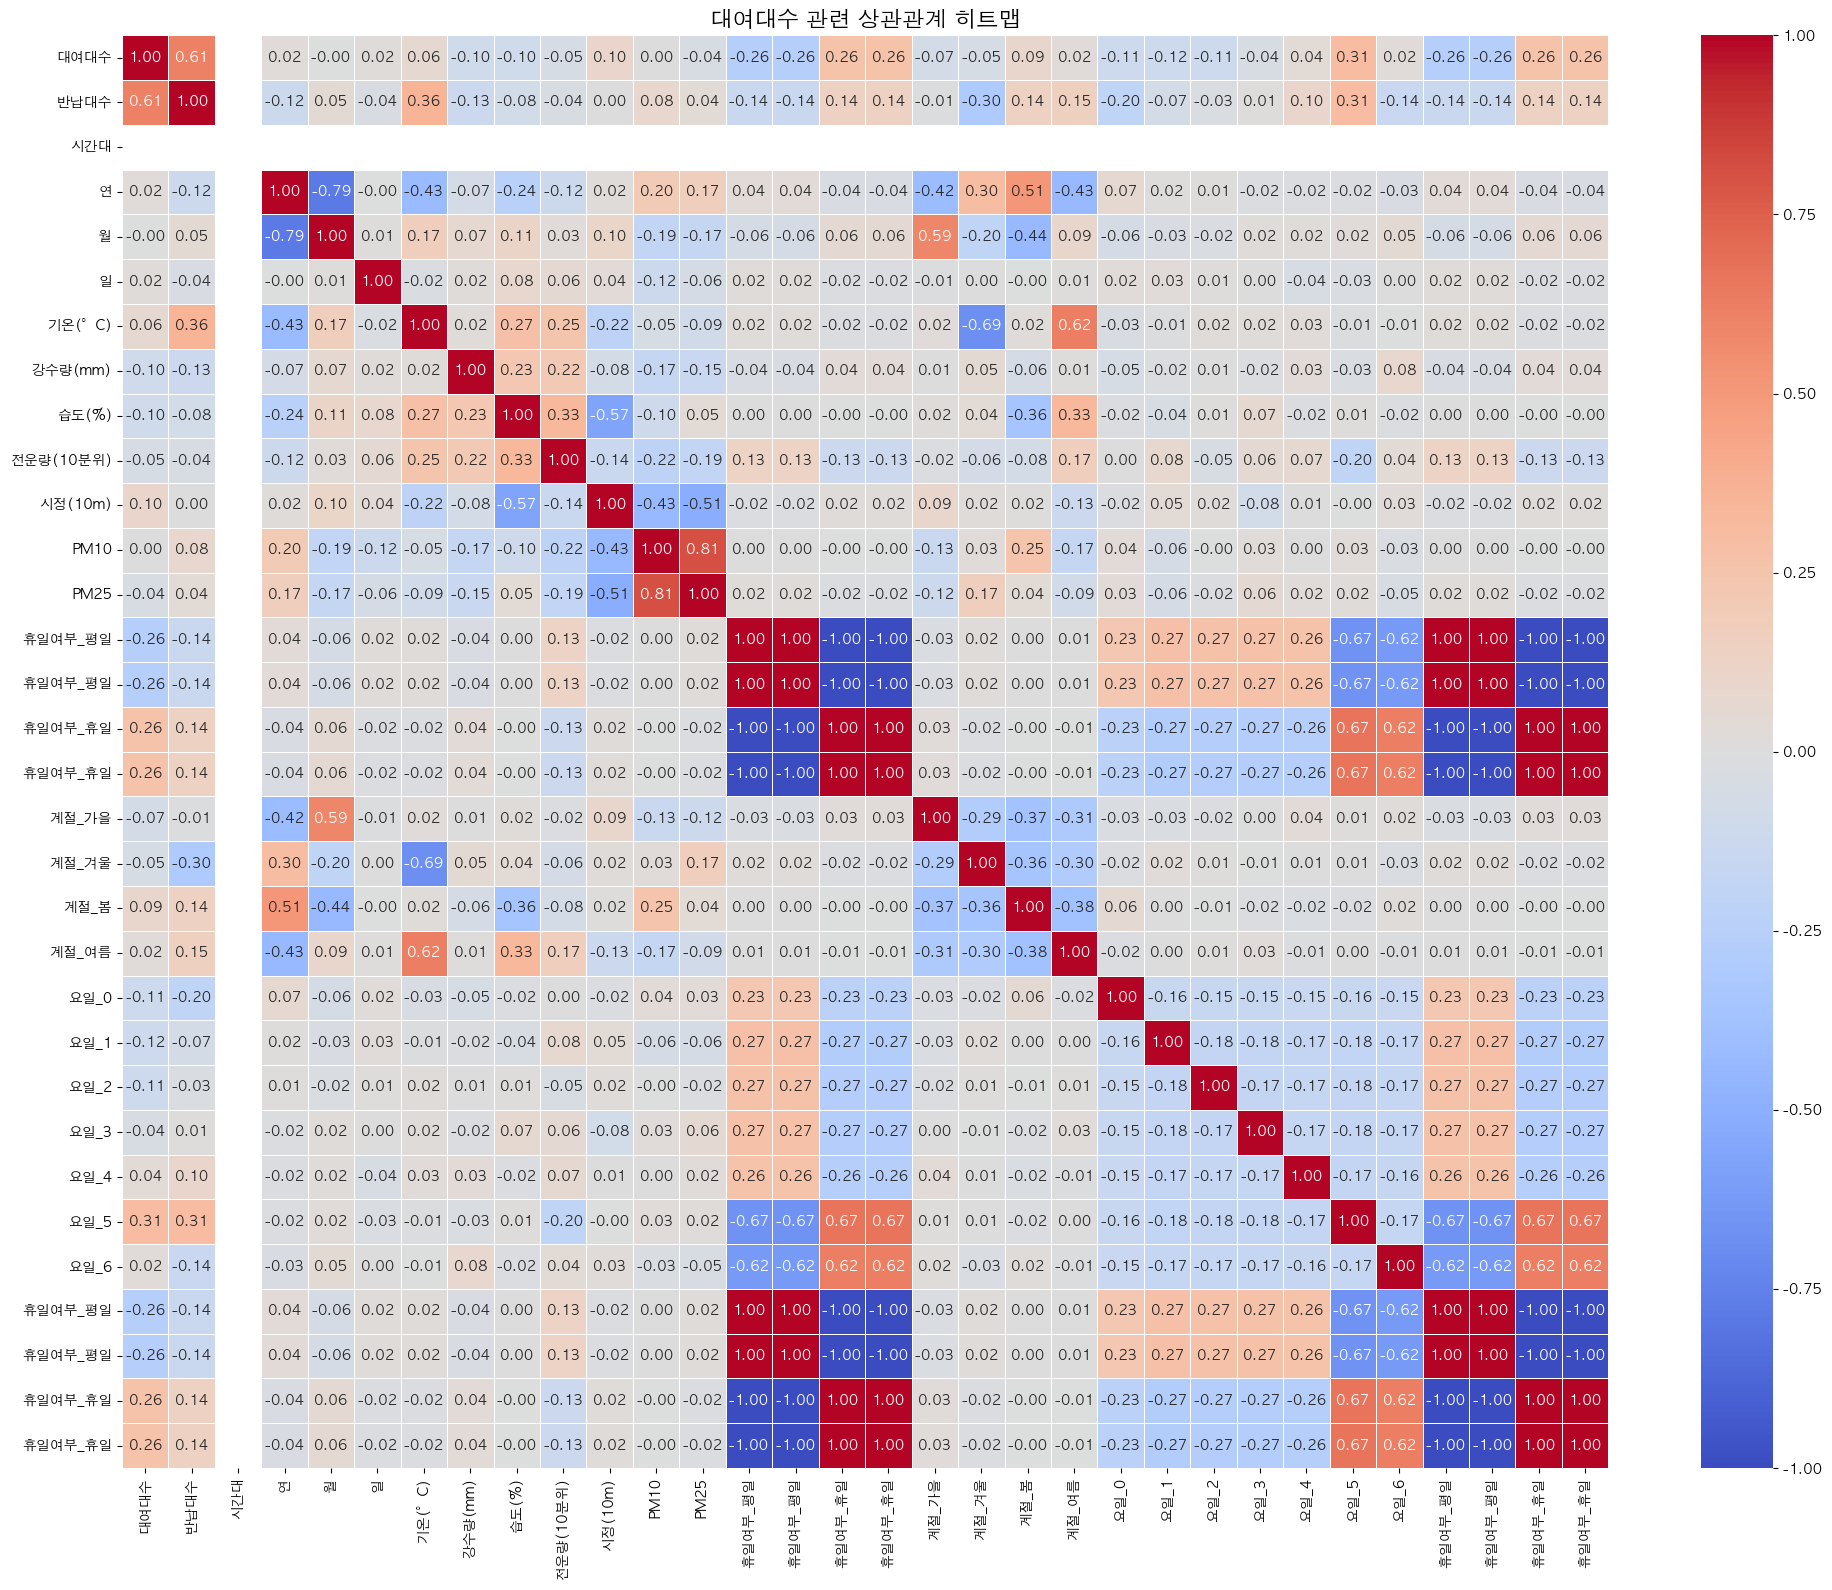

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 범주형 변수들을 더미 변수로 변환
categorical_columns = ['휴일여부', '계절', '요일', '휴일여부']
merged_df_encoded = pd.get_dummies(merged_df, columns=categorical_columns)

# 수치형 변수 선택
numeric_columns = ['대여대수', '반납대수', '시간대', '연', '월', '일', '기온(°C)', '강수량(mm)', '습도(%)', 
                   '전운량(10분위)', '시정(10m)', 'PM10', 'PM25']

# 더미 변수 선택
dummy_columns = [col for col in merged_df_encoded.columns if any(cat in col for cat in categorical_columns)]

# 상관관계를 계산할 열 선택
correlation_data = merged_df_encoded[numeric_columns + dummy_columns]

# 상관관계 행렬 계산
correlation_matrix = correlation_data.corr()

# 히트맵 시각화
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('대여대수 관련 상관관계 히트맵', fontsize=16)
plt.tight_layout()
plt.show()

> 출퇴근용이 너무 앞도적이라 날씨와는 전혀 없어 보인다...

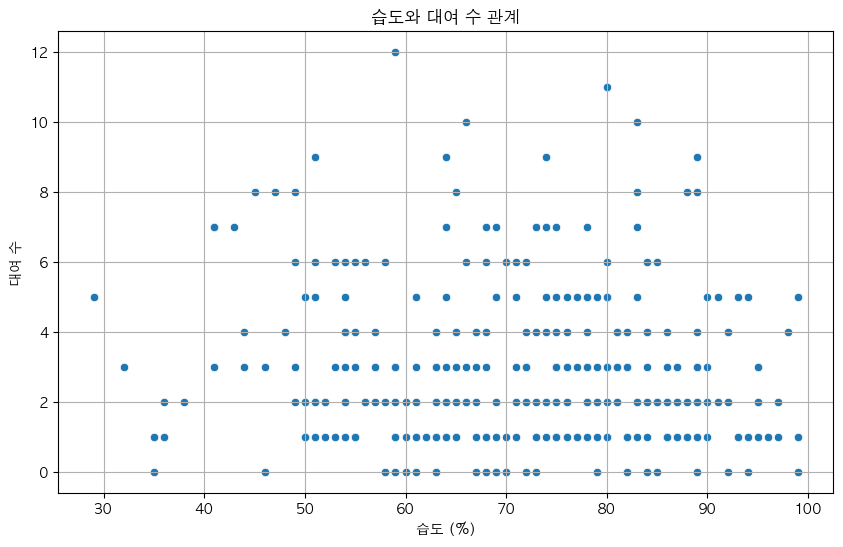

In [204]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='습도(%)', y='대여대수', data=merged_df)
plt.title('습도와 대여 수 관계')
plt.xlabel('습도 (%)')
plt.ylabel('대여 수')
plt.grid()
plt.show()

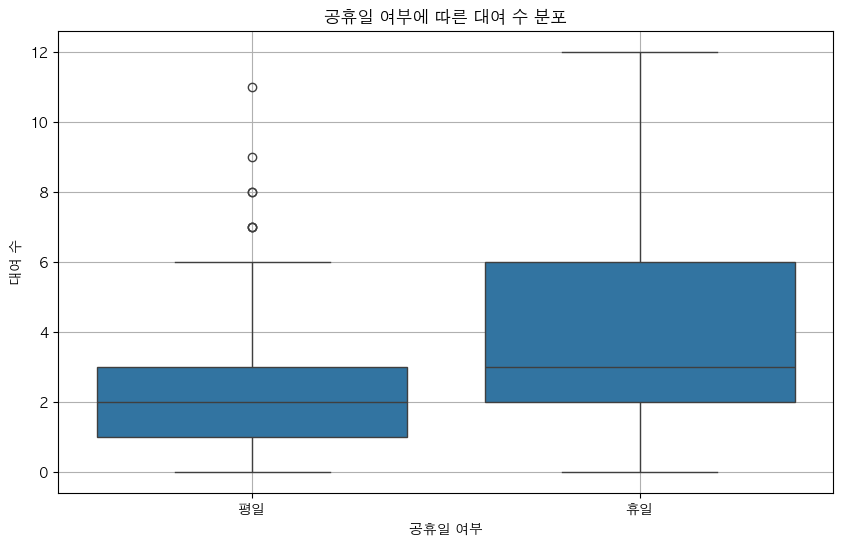

In [205]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='휴일여부', y='대여대수', data=merged_df)
plt.title('공휴일 여부에 따른 대여 수 분포')
plt.xlabel('공휴일 여부')
plt.ylabel('대여 수')
plt.grid()
plt.show()

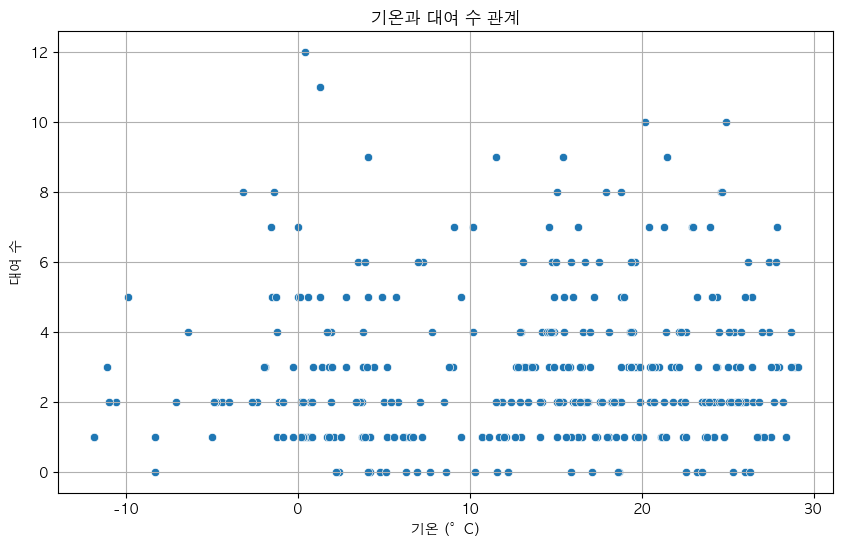

In [206]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='기온(°C)', y='대여대수', data=merged_df)
plt.title('기온과 대여 수 관계')
plt.xlabel('기온 (°C)')
plt.ylabel('대여 수')
plt.grid()
plt.show()

> 기온과는 별 관계가 없어 보인다..

### 실시간 api

In [329]:
import requests
import json

# API 엔드포인트 URL
url = "http://openapi.seoul.go.kr:8088/4d4578666b64696e3738416348554e/json/bikeList/1/1000"

# API 요청
response = requests.get(url)

# JSON 형식으로 데이터 파싱
data = json.loads(response.text)

# 롯데타워 잠실역 2번출구 따릉이 스테이션 정보 찾기
target_station = None
for station in data['rentBikeStatus']['row']:
    if "롯데월드타워(잠실역2번출구 쪽)" in station['stationName']:
        target_station = station
        break

# 결과 출력
if target_station:
    print(f"스테이션 이름: {target_station['stationName']}")
    print(f"현재 사용 가능한 자전거 수: {target_station['parkingBikeTotCnt']}")
    print(f"거치대 개수: {target_station['rackTotCnt']}")
    print(f"거치율: {target_station['shared']}%")
else:
    print("롯데타워 잠실역 2번출구 따릉이 스테이션을 찾을 수 없습니다.")

스테이션 이름: 1210. 롯데월드타워(잠실역2번출구 쪽)
현재 사용 가능한 자전거 수: 58
거치대 개수: 30
거치율: 193%


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소     8377 non-null   object 
 1   날짜      8377 non-null   object 
 2   시간대     8377 non-null   int64  
 3   대여대수    8377 non-null   float64
 4   반납대수    8377 non-null   float64
 5   연       8377 non-null   int64  
 6   월       8377 non-null   int64  
 7   일       8377 non-null   int64  
 8   휴일여부    8377 non-null   object 
 9   계절      8377 non-null   object 
 10  요일      8377 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 720.0+ KB


In [217]:
# 계절 다시 매핑
def get_seasons(month):
    if month in [3, 4, 5]:
        return 0    # 봄
    elif month in [6, 7, 8]:
        return 1    # 여름
    elif month in [9, 10, 11]:
        return 2    # 가을
    else:
        return 3    # 겨울

df['계절'] = df['월'].apply(get_seasons)

# 휴일여부 매핑
holiday_map = {'평일': 0, '휴일': 1}
df['휴일여부'] = df['휴일여부'].map(holiday_map)

# 데이터 타입 확인
print(df['휴일여부'].dtype)  # int64인지 확인
# 데이터 타입 확인
print(df['계절'].dtype)  # int64인지 확인

int64
int64


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소     8377 non-null   object 
 1   날짜      8377 non-null   object 
 2   시간대     8377 non-null   int64  
 3   대여대수    8377 non-null   float64
 4   반납대수    8377 non-null   float64
 5   연       8377 non-null   int64  
 6   월       8377 non-null   int64  
 7   일       8377 non-null   int64  
 8   휴일여부    8377 non-null   int64  
 9   계절      8377 non-null   int64  
 10  요일      8377 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 720.0+ KB


In [219]:
df.to_csv("../data/따릉이전처리.csv", index=False)

In [281]:
df = pd.read_csv("../data/따릉이전처리.csv")
df.head()

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절,요일
0,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,0,0,0
1,롯데월드타워(잠실역2번출구 쪽),2023-05-01,1,1.0,0.0,2023,5,1,0,0,0
2,롯데월드타워(잠실역2번출구 쪽),2023-05-01,4,1.0,0.0,2023,5,1,0,0,0
3,롯데월드타워(잠실역2번출구 쪽),2023-05-01,6,0.0,3.0,2023,5,1,0,0,0
4,롯데월드타워(잠실역2번출구 쪽),2023-05-01,7,4.0,7.0,2023,5,1,0,0,0


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8377 entries, 0 to 8376
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소     8377 non-null   object 
 1   날짜      8377 non-null   object 
 2   시간대     8377 non-null   int64  
 3   대여대수    8377 non-null   float64
 4   반납대수    8377 non-null   float64
 5   연       8377 non-null   int64  
 6   월       8377 non-null   int64  
 7   일       8377 non-null   int64  
 8   휴일여부    8377 non-null   int64  
 9   계절      8377 non-null   int64  
 10  요일      8377 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 720.0+ KB


In [283]:
subway = pd.read_csv("../data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding='cp949')
subway.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202410,1호선,동대문,634,22,12458,1990,10170,7253,16816,...,9969,771,2838,4,231,0,0,0,0,20241103
1,202410,1호선,동묘앞,223,4,3169,1026,3758,5319,9258,...,4882,106,1831,0,263,0,0,0,0,20241103
2,202410,1호선,서울역,573,9,8623,9367,14928,61884,42711,...,13969,2848,3802,1,207,0,0,0,0,20241103
3,202410,1호선,시청,84,1,2078,5753,4249,30299,8265,...,3775,506,979,1,41,0,0,0,0,20241103
4,202410,1호선,신설동,384,22,9813,2340,10345,10232,22756,...,9779,375,2781,0,1,0,1,0,0,20241103


In [284]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69931 entries, 0 to 69930
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           69931 non-null  int64 
 1   호선명           69931 non-null  object
 2   지하철역          69931 non-null  object
 3   04시-05시 승차인원  69931 non-null  int64 
 4   04시-05시 하차인원  69931 non-null  int64 
 5   05시-06시 승차인원  69931 non-null  int64 
 6   05시-06시 하차인원  69931 non-null  int64 
 7   06시-07시 승차인원  69931 non-null  int64 
 8   06시-07시 하차인원  69931 non-null  int64 
 9   07시-08시 승차인원  69931 non-null  int64 
 10  07시-08시 하차인원  69931 non-null  int64 
 11  08시-09시 승차인원  69931 non-null  int64 
 12  08시-09시 하차인원  69931 non-null  int64 
 13  09시-10시 승차인원  69931 non-null  int64 
 14  09시-10시 하차인원  69931 non-null  int64 
 15  10시-11시 승차인원  69931 non-null  int64 
 16  10시-11시 하차인원  69931 non-null  int64 
 17  11시-12시 승차인원  69931 non-null  int64 
 18  11시-12시 하차인원  69931 non-null  int64 
 19  12시-

In [285]:
# 잠실역 데이터만 필터링 (2호선)
subway_jamsil = subway[(subway['호선명'] == '2호선') & 
                      (subway['지하철역'] == '잠실(송파구청)')]

In [286]:
# 시간대별 승하차 인원 컬럼 확인
time_columns = [col for col in subway.columns if '시-' in col]


In [287]:
# 데이터 재구성
subway_melted = pd.melt(
    subway_jamsil,
    id_vars=['사용월'],
    value_vars=time_columns,
    var_name='시간대',
    value_name='승하차인원'
)


In [288]:
# 시간대 추출 (예: '04시-05시 승차인원' -> 4)
subway_melted['시간'] = subway_melted['시간대'].str.extract('(\d+)').astype(int)

In [289]:
# 날짜 형식 변환
subway_melted['사용월'] = pd.to_datetime(subway_melted['사용월'].astype(str), format='%Y%m')
subway_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656 entries, 0 to 4655
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용월     4656 non-null   datetime64[ns]
 1   시간대     4656 non-null   object        
 2   승하차인원   4656 non-null   int64         
 3   시간      4656 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 145.6+ KB


In [290]:
# subway_melted 데이터 필터링
subway_melted_filtered = subway_melted[subway_melted['사용월'] >= '2023-05-01']

In [291]:
# 시간대 문자열에서 숫자만 추출 (예: '04시-05시 승차인원' -> 4)
subway_melted_filtered['시간대'] = subway_melted_filtered['시간대'].str.extract('(\d+)').astype(int)

# subway_melted의 시간대를 int로 변환
subway_melted_filtered['시간대'] = subway_melted_filtered['시간대'].astype(int)

In [292]:
# df의 날짜를 datetime으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])
# df에 사용월 컬럼 추가
df['사용월'] = df['날짜'].dt.to_period('M').dt.to_timestamp()

In [293]:
# 날짜와 시간대를 기준으로 병합 (사용월은 제외하고 시간대만 기준으로 사용)
merged_df = pd.merge(df, subway_melted_filtered[['시간대', '승하차인원']], 
                    how='left', 
                    on=['시간대'])

# 필요없는 컬럼 제거
merged_df = merged_df.drop(['시간'], axis=1, errors='ignore')

In [294]:
# 결측치 확인
print(merged_df.isnull().sum())

대여소      0
날짜       0
시간대      0
대여대수     0
반납대수     0
연        0
월        0
일        0
휴일여부     0
계절       0
요일       0
사용월      0
승하차인원    0
dtype: int64


In [295]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301572 entries, 0 to 301571
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   대여소     301572 non-null  object        
 1   날짜      301572 non-null  datetime64[ns]
 2   시간대     301572 non-null  int64         
 3   대여대수    301572 non-null  float64       
 4   반납대수    301572 non-null  float64       
 5   연       301572 non-null  int64         
 6   월       301572 non-null  int64         
 7   일       301572 non-null  int64         
 8   휴일여부    301572 non-null  int64         
 9   계절      301572 non-null  int64         
 10  요일      301572 non-null  int64         
 11  사용월     301572 non-null  datetime64[ns]
 12  승하차인원   301572 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(8), object(1)
memory usage: 29.9+ MB


In [296]:
merged_df.head()

,대여소,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절,요일,사용월,승하차인원
0,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,2023-05-01,4876
1,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,2023-05-01,4333
2,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,2023-05-01,4747
3,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,2023-05-01,5137
4,롯데월드타워(잠실역2번출구 쪽),2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,2023-05-01,4742


In [297]:
merged_df.columns

Index(['대여소', '날짜', '시간대', '대여대수', '반납대수', '연', '월', '일', '휴일여부', '계절', '요일',
       '사용월', '승하차인원'],
      dtype='object')

In [300]:
merged_df.drop(columns=['대여소', '사용월'], inplace=True)

In [301]:
merged_df.to_csv("../data/따릉이전처리.csv", index=False)

In [302]:
df = pd.read_csv("../data/따릉이전처리.csv")
df.head()

,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절,요일,승하차인원
0,2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,4876
1,2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,4333
2,2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,4747
3,2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,5137
4,2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,4742


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301572 entries, 0 to 301571
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   날짜      301572 non-null  object 
 1   시간대     301572 non-null  int64  
 2   대여대수    301572 non-null  float64
 3   반납대수    301572 non-null  float64
 4   연       301572 non-null  int64  
 5   월       301572 non-null  int64  
 6   일       301572 non-null  int64  
 7   휴일여부    301572 non-null  int64  
 8   계절      301572 non-null  int64  
 9   요일      301572 non-null  int64  
 10  승하차인원   301572 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 25.3+ MB


In [304]:
from sklearn.preprocessing import MinMaxScaler
# 승하차인원 정규화
scaler = MinMaxScaler()
df['승하차인원'] = scaler.fit_transform(df[['승하차인원']])

# 정규화된 데이터프레임을 CSV 파일로 저장
df.to_csv("../data/따릉이전처리.csv", index=False)

In [323]:
df = pd.read_csv("../data/따릉이전처리.csv")

In [306]:
df.head()

,날짜,시간대,대여대수,반납대수,연,월,일,휴일여부,계절,요일,승하차인원
0,2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,0.018300
1,2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,0.016262
2,2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,0.017816
3,2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,0.019280
4,2023-05-01,0,1.0,1.0,2023,5,1,0,0,0,0.017797


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301572 entries, 0 to 301571
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   날짜      301572 non-null  object 
 1   시간대     301572 non-null  int64  
 2   대여대수    301572 non-null  float64
 3   반납대수    301572 non-null  float64
 4   연       301572 non-null  int64  
 5   월       301572 non-null  int64  
 6   일       301572 non-null  int64  
 7   휴일여부    301572 non-null  int64  
 8   계절      301572 non-null  int64  
 9   요일      301572 non-null  int64  
 10  승하차인원   301572 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 25.3+ MB


### 모델학습

In [325]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [326]:
# 특성 선택
X = df[['시간대', '월', '일', '휴일여부', '계절', '요일', '승하차인원']]
y_rental = df['대여대수']
y_return = df['반납대수']

# 데이터 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train_rental, X_test_rental, y_train_rental, y_test_rental = train_test_split(
    X_scaled, y_rental, test_size=0.2, random_state=42)
X_train_return, X_test_return, y_train_return, y_test_return = train_test_split(
    X_scaled, y_return, test_size=0.2, random_state=42)

In [327]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

def train_and_evaluate_model(X, y, model_name, task):
    model = RandomForestRegressor(
        n_estimators=300,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
    
    # 교차 검증
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"\n{model_name} - {task} 모델 교차 검증 결과:")
    print(f"평균 R2 Score: {cv_scores.mean():.4f} (표준편차: {cv_scores.std():.4f})")
    
    # 전체 데이터로 학습
    model.fit(X, y)
    
    # 예측 및 성능 평가
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f"전체 데이터 R2 Score: {r2:.4f}")
    
    return model

# 대여 모델 학습 및 평가
rental_model = train_and_evaluate_model(X_scaled, y_rental, "Random Forest", "대여")

# 반납 모델 학습 및 평가
return_model = train_and_evaluate_model(X_scaled, y_return, "Random Forest", "반납")


Random Forest - 대여 모델 교차 검증 결과:
평균 R2 Score: 0.1217 (표준편차: 0.5776)
전체 데이터 R2 Score: 0.9608

Random Forest - 반납 모델 교차 검증 결과:
평균 R2 Score: 0.0720 (표준편차: 0.5738)
전체 데이터 R2 Score: 0.9263


In [328]:
import joblib

# 대여 모델 저장
joblib.dump({
    "model": rental_model,
    "scaler": scaler
}, "rental_model_lotte.h5")

# 반납 모델 저장
joblib.dump({
    "model": return_model,
    "scaler": scaler
}, "return_model_lotte.h5")

print("모델이 성공적으로 저장되었습니다.")

모델이 성공적으로 저장되었습니다.


<!-- ---
# 2호선 승하차 데이터 추가 -->

<!-- > 정규화 -->